In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#data = pd.read_csv("data/AmazonProductReview.csv")
data = pd.read_csv("/content/AmazonProductReview.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [8]:
data.head(3)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams


In [9]:
missing_values = ((data.isnull().sum())/len(data))*100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# % DE DATOS FALTANTES POR COLUMNA
pd.set_option('display.max_rows', None)
print(missing_values)
pd.reset_option('display.max_rows')

reviews.userCity        100.000000
reviews.userProvince    100.000000
sizes                   100.000000
reviews.doRecommend      66.249217
dimension                64.621165
weight                   57.044458
colors                   51.534126
ean                      43.769568
upc                      43.769568
reviews.numHelpful       43.644333
manufacturerNumber       43.519098
manufacturer             39.574202
reviews.rating           26.299311
reviews.date             23.794615
reviews.title             1.064496
reviews.username          1.064496
dtype: float64


In [10]:
data["reviews.doRecommend"].value_counts(dropna=False)

,count
reviews.doRecommend,
NaN,1058
True,503
False,36


In [11]:
data["reviews.doRecommend"].value_counts(normalize=True)

,proportion
reviews.doRecommend,
True,0.93321
False,0.06679


In [12]:
frecuenciaRecommend=data["reviews.doRecommend"].value_counts(normalize=True)
frecuenciaRecommend

,proportion
reviews.doRecommend,
True,0.93321
False,0.06679


In [13]:
def imputar_aleatoria_ponderada(series):
    values = frecuenciaRecommend.index
    probabilities = frecuenciaRecommend.values
    return series.apply(lambda x: np.random.choice(values, p=probabilities) if pd.isnull(x) else x)
data["reviews.doRecommend"] = imputar_aleatoria_ponderada(data["reviews.doRecommend"])

In [14]:
data["reviews.doRecommend"].value_counts(dropna=False)

,count
reviews.doRecommend,
True,1504
False,93


In [15]:
data["reviews.numHelpful"].describe()

,reviews.numHelpful
count,900.000000
mean,83.584444
std,197.150238
min,0.000000
25%,0.000000
50%,0.000000
75%,34.000000
max,997.000000


<ipython-input-16-2157aca61b22>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["reviews.numHelpful"].fillna(data["reviews.numHelpful"].median(), inplace=True)


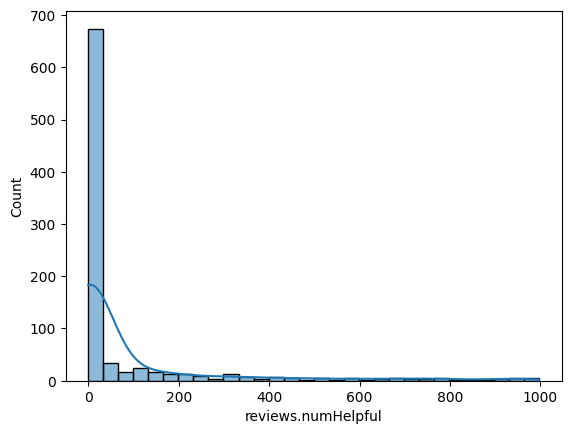

In [16]:
sns.histplot(data["reviews.numHelpful"], bins=30, kde=True)
#Los datos se concentran en valores bajos, en especial el 0. Por lo que se realizara una imputacion de la mediana en esta columna
data["reviews.numHelpful"].fillna(data["reviews.numHelpful"].median(), inplace=True)

In [17]:
missing_values[missing_values > 38].index

Index(['reviews.userCity', 'reviews.userProvince', 'sizes',
       'reviews.doRecommend', 'dimension', 'weight', 'colors', 'ean', 'upc',
       'reviews.numHelpful', 'manufacturerNumber', 'manufacturer'],
      dtype='object')

In [18]:
columns_to_drop = ['reviews.userCity', 'reviews.userProvince', 'sizes'
                   , 'dimension', 'weight', 'colors', 'ean', 'upc',
                   'manufacturerNumber', 'manufacturer']
df = data.drop(columns=columns_to_drop)

In [19]:
df.describe()

,reviews.numHelpful,reviews.rating
count,1597.000000,1177.000000
mean,47.104571,4.359388
std,153.666064,1.021445
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,997.000000,5.000000


In [20]:
df["reviews.rating"].unique()

array([ 5.,  4., nan,  3.,  1.,  2.])

In [21]:
frecuenciaRating=df["reviews.rating"].value_counts(normalize=True)
frecuenciaRating

,proportion
reviews.rating,
5.0,0.629567
4.0,0.200510
3.0,0.105353
1.0,0.035684
2.0,0.028887


In [22]:
def imputar_aleatoria_ponderada(series):
    values = frecuenciaRating.index
    probabilities = frecuenciaRating.values
    return series.apply(lambda x: np.random.choice(values, p=probabilities) if pd.isnull(x) else x)


In [23]:
df['rating_imputed'] = df['reviews.rating'].copy()
df['rating_imputed'] = imputar_aleatoria_ponderada(df['rating_imputed'])

In [24]:
DF_Limpio = df[["id","name","reviews.title","reviews.text", "rating_imputed","reviews.doRecommend","reviews.numHelpful"]]
DF_Limpio= DF_Limpio[df["reviews.title"].isna()==False]

In [25]:
DF_Limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1580 entries, 0 to 1596
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1580 non-null   object 
 1   name                 1580 non-null   object 
 2   reviews.title        1580 non-null   object 
 3   reviews.text         1580 non-null   object 
 4   rating_imputed       1580 non-null   float64
 5   reviews.doRecommend  1580 non-null   bool   
 6   reviews.numHelpful   1580 non-null   float64
dtypes: bool(1), float64(2), object(4)
memory usage: 87.9+ KB


In [26]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [27]:
def Tokenizador(texto):
    doc = nlp(texto)
    lista_tokens=[word.text.strip().lower() for word in doc if len(word.text.strip()) > 0]
    return lista_tokens

def remove_words(textoTokenizado):
    doc = nlp(" ".join(textoTokenizado))
    TextoLimpioTokenizado = [word.text for word in doc if (not word.is_stop | word.is_punct) and word.orth_ != ' ']
    return TextoLimpioTokenizado

def lematizador(TextoLimpioTokenizado):
    doc = nlp(" ".join(TextoLimpioTokenizado))
    listaTokensLematizados=[word.lemma_ for word in doc]
    #listaTokensLematizados=[word.lemma_ for word in doc if len(word.text)>2]
    return listaTokensLematizados

#Normalizador
def Pipeline(texto):
    lista_tokens = Tokenizador(texto)
    TextoLimpioTokenizado = remove_words(lista_tokens)
    listaTokensLematizados = lematizador(TextoLimpioTokenizado)
    return listaTokensLematizados

In [28]:
DF_Limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1580 entries, 0 to 1596
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1580 non-null   object 
 1   name                 1580 non-null   object 
 2   reviews.title        1580 non-null   object 
 3   reviews.text         1580 non-null   object 
 4   rating_imputed       1580 non-null   float64
 5   reviews.doRecommend  1580 non-null   bool   
 6   reviews.numHelpful   1580 non-null   float64
dtypes: bool(1), float64(2), object(4)
memory usage: 87.9+ KB


In [29]:
DF_Limpio['ReviewTitulo_procesado'] = DF_Limpio['reviews.title'].apply(Pipeline)
DF_Limpio['ReviewTexto_procesado'] = DF_Limpio['reviews.text'].apply(Pipeline)

In [30]:
DF_Limpio.head(9)

,id,name,reviews.title,reviews.text,rating_imputed,reviews.doRecommend,reviews.numHelpful,ReviewTitulo_procesado,ReviewTexto_procesado
0,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,"Paperwhite voyage, no regrets!",I initially had trouble deciding between the p...,5.0,True,139.0,"[paperwhite, voyage, regret]","[initially, trouble, decide, paperwhite, voyag..."
1,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,One Simply Could Not Ask For More,Allow me to preface this with a little history...,5.0,True,126.0,"[simply, ask]","[allow, preface, little, history, casual, read..."
2,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,Great for those that just want an e-reader,I am enjoying it so far. Great for reading. Ha...,4.0,True,69.0,"[great, want, e, reader]","[enjoy, far, great, read, original, fire, 2012..."
3,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,Love / Hate relationship,I bought one of the first Paperwhites and have...,5.0,True,2.0,"[love, hate, relationship]","[buy, paperwhite, please, constant, companion,..."
4,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,I LOVE IT,I have to say upfront - I don't like coroporat...,5.0,True,17.0,[love],"[upfront, like, coroporate, hermetically, clos..."
5,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,Great device for reading. 8 people found this ...,"My previous kindle was a DX, this is my second...",5.0,True,0.0,"[great, device, read, 8, people, find, helpful...","[previous, kindle, dx, second, kindle, year, l..."
6,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,One Simply Could Not Ask For More 28 people fo...,Allow me to preface this with a little history...,5.0,True,0.0,"[simply, ask, 28, people, find, helpful, revie...","[allow, preface, little, history, casual, read..."
7,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,Definitely better than the previous generation...,Just got mine right now. Looks the same as the...,4.0,True,0.0,"[definitely, well, previous, generation, 16, p...","[get, right, look, previous, generation, kindl..."
8,AVpe7AsMilAPnD_xQ78G,Kindle Paperwhite,"Paperwhite voyage, no regrets! 16 people found...",I initially had trouble deciding between the p...,1.0,True,0.0,"[paperwhite, voyage, regret, 16, people, find,...","[initially, trouble, decide, paperwhite, voyag..."


In [31]:
DF_Limpio["name"].value_counts(normalize=1)*100

,proportion
name,
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,34.303797
Amazon Fire TV,10.506329
Amazon Premium Headphones,8.417722
Fire HD 6 Tablet,5.506329
"Kindle Fire HDX 7""",3.354430
...,...
Amazon Tap Sling Cover - Green,0.189873
Fire Kids Edition Tablet,0.189873
Fire HD 8 Tablet with Alexa,0.189873


In [32]:
def sentimiento(rating):
    if rating >= 4:
        return "Positivo"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negativo"

DF_Limpio["Sentimiento"] = DF_Limpio["rating_imputed"].apply(sentimiento)

In [33]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

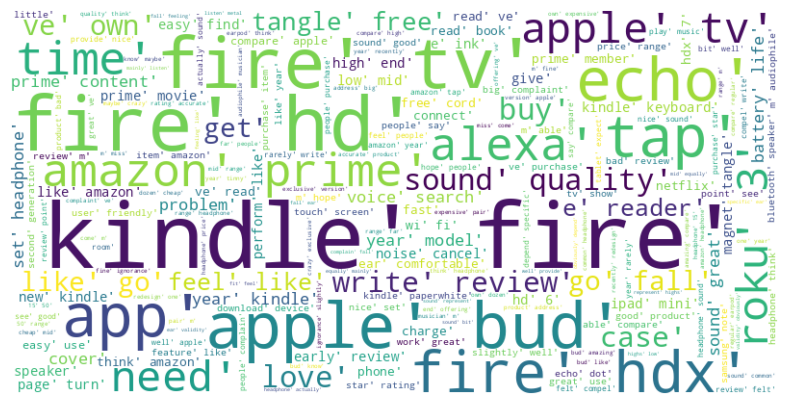

In [34]:
texto_titulos = " ".join(review for review in DF_Limpio["ReviewTexto_procesado"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulos)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

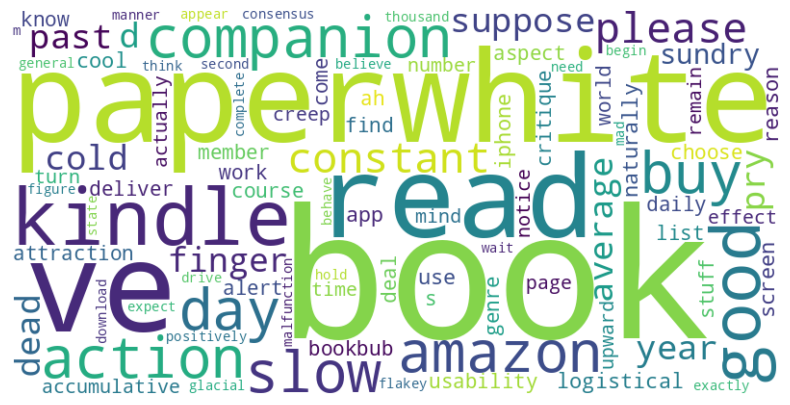

In [35]:
texto_review=" ".join(DF_Limpio["ReviewTexto_procesado"].iloc[3])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_review)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
top =DF_Limpio["name"].value_counts(normalize=1)*100
top

,proportion
name,
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,34.303797
Amazon Fire TV,10.506329
Amazon Premium Headphones,8.417722
Fire HD 6 Tablet,5.506329
"Kindle Fire HDX 7""",3.354430
...,...
Amazon Tap Sling Cover - Green,0.189873
Fire Kids Edition Tablet,0.189873
Fire HD 8 Tablet with Alexa,0.189873


In [37]:
top.keys()[:5]

Index(['Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker',
       'Amazon Fire TV', 'Amazon Premium Headphones', 'Fire HD 6 Tablet',
       'Kindle Fire HDX 7"'],
      dtype='object', name='name')

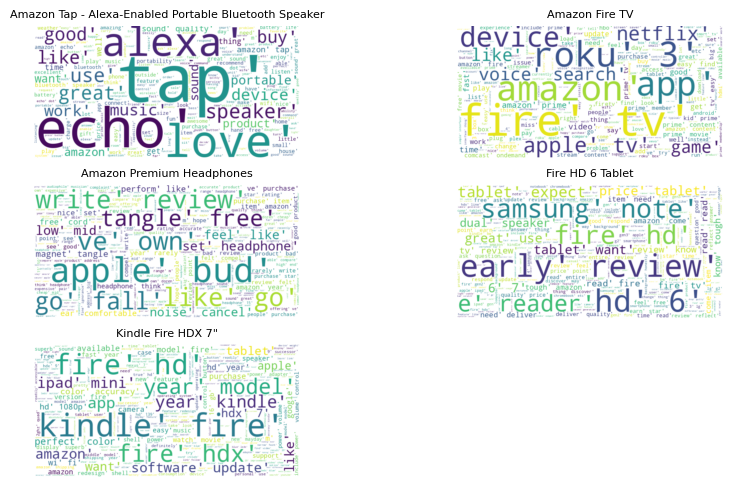

In [38]:
plt.figure(figsize=(10,10))
for i,producto in enumerate(top.keys()[:5]):
    plt.subplot(5,2,i+1)
    texto_titulos = " ".join(review for review in DF_Limpio[DF_Limpio["name"]==producto]["ReviewTexto_procesado"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulos)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(producto,fontsize =8)
    plt.axis('off')
    #plt.show()



<Axes: xlabel='rating_imputed', ylabel='Count'>

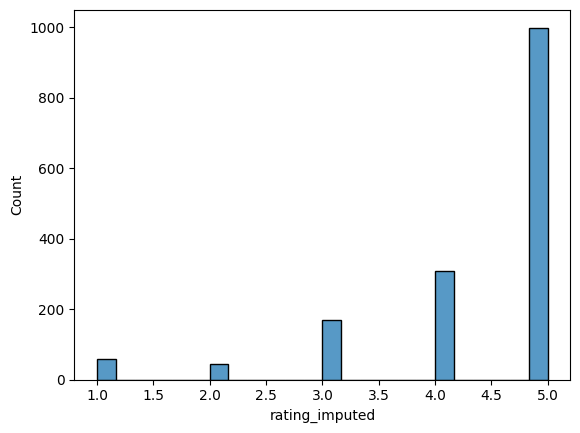

In [39]:
sns.histplot(data=DF_Limpio,x="rating_imputed")

<Axes: ylabel='rating_imputed'>

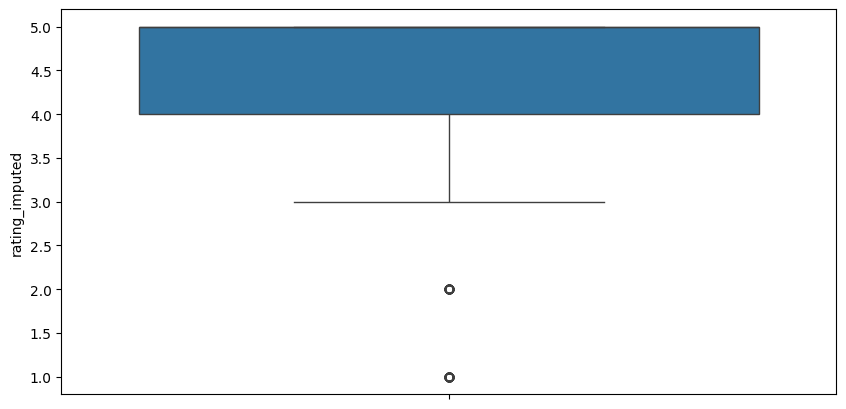

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=DF_Limpio,y="rating_imputed")

Text(0.5, 1.0, 'Distribución de sentimientos')

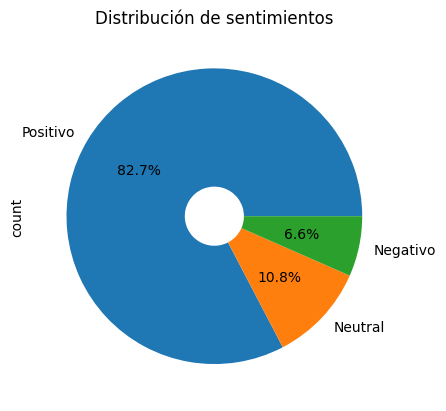

In [41]:
DF_Limpio["Sentimiento"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', explode=(0,0,0), wedgeprops=dict(width=0.8))
plt.title("Distribución de sentimientos")

In [42]:
DF_Limpio['JoinedReviewProcesada'] = DF_Limpio['ReviewTexto_procesado'].apply(lambda x: " ".join(x))

In [43]:
df_main = DF_Limpio[["id","JoinedReviewProcesada","rating_imputed","Sentimiento","reviews.doRecommend"]].copy()

In [44]:
df_main['reviews.doRecommend'] = df_main['reviews.doRecommend'].apply(lambda x: 1 if x == True else 0)

In [45]:
df_main[['rating_imputed',"JoinedReviewProcesada"]].iloc[2].values

array([4.0,
       'enjoy far great read original fire 2012 fire eye hurt read long experienced paperwhite'],
      dtype=object)

In [46]:
DF_Limpio[["reviews.text"]].iloc[2].values

array(["I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet."],
      dtype=object)

In [54]:
df_main = df_main.loc[:,["JoinedReviewProcesada","Sentimiento"]]

### Modelado

In [55]:
from sklearn.model_selection import train_test_split


In [74]:
X = df_main["JoinedReviewProcesada"]
y = df_main["Sentimiento"].map({"Positivo":2,"Negativo":0,"Neutral":1})

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [78]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 etiquetas: positivo, negativo, neutral


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

train_encodings = tokenize_function(x_train)
val_encodings = tokenize_function(x_val)
test_encodings = tokenize_function(x_test)

In [80]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.values

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Crear los datasets
train_dataset = SentimentDataset(train_encodings, y_train)
val_dataset = SentimentDataset(val_encodings, y_val)
test_dataset = SentimentDataset(test_encodings, y_test)


In [81]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True
)




/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=val_dataset)

trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
trainer.evaluate(test_dataset)